In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  8 16:55:20 2019

@author: mor
"""

import pandas as pd
import matplotlib.pyplot as plt
import time
import dask.dataframe as dd



In [2]:


# Read from 'data/WDI.csv': df
df=dd.read_csv('data/WDI.csv')

# Boolean series where 'Indicator Code' is 'SP.REG.BRTH.UR.ZS': toxins
toxins = df['Indicator Code'] == 'SP.REG.BRTH.UR.ZS'
# Boolean series where 'Region' is 'East Asia & Pacific': region
region = df['Region'] == 'East Asia & Pacific'

# Filter the DataFrame using toxins & region: filtered
filtered=df[toxins&region]



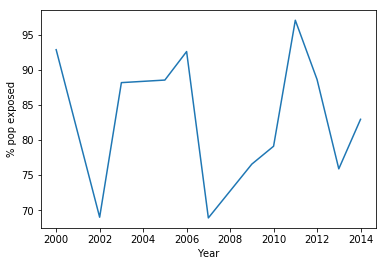

In [3]:


# Grouby filtered by the 'Year' column: yearly
yearly=filtered.groupby('Year')

# Calculate the mean of yearly: yearly_mean
yearly_mean=yearly.mean()

# Call .compute() to perform the computation: result
result=yearly_mean.compute()

# Plot the 'value' column with .plot.line()
result['value'].plot.line()
plt.ylabel('% pop exposed')
plt.show()



In [4]:


# Define a function with df as input: by_region
def by_region(df):

    # Create the toxins array
    toxins = df['Indicator Code'] == 'SP.REG.BRTH.UR.ZS'

    # Create the y2015 array
    y2015 = df['Year'] == 2015

    # Filter the DataFrame and group by the 'Region' column
    regions = df[y2015&toxins].groupby('Region')

    # Return the mean of the 'value' column of regions
    return regions['value'].mean()



In [5]:

# =============================================================================
# time in pandas
# =============================================================================
# Call time.time()
t0 = time.time()

# Read 'WDI.csv' into df
df = pd.read_csv('data/WDI.csv')

# Group df by region: result
result = by_region(df)

# Call time.time()
t1 = time.time()

# Print the execution time
print((t1-t0)*1000)



323.46391677856445


In [6]:


# Time the execution of just by_region with Pandas and print in milliseconds
df = pd.read_csv('data/WDI.csv')
t0 = time.time()
result = by_region(df)
t1 = time.time()
print((t1-t0)*1000)



20.66946029663086


In [7]:

# =============================================================================
# time in dask
# =============================================================================
# Time the execution of dd.read_csv and by_region together with 'WDI.csv' and print in milliseconds
t0 = time.time()
df = dd.read_csv('data/WDI.csv')
result = by_region(df)
t1 = time.time()
print((t1-t0)*1000)



60.814619064331055


In [8]:


# Read all .csv files: df
df = dd.read_csv('data/taxi/*.csv', assume_missing=True)

# Make column 'tip_fraction'
df['tip_fraction'] = df['tip_amount'] / (df['total_amount'] - df['tip_amount'])

# Convert 'tpep_dropoff_datetime' column to datetime objects
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'])

# Construct column 'hour'
df['hour'] = df['tpep_dropoff_datetime'].dt.hour




In [9]:


# Filter rows where payment_type == 1: credit
credit = df[df.payment_type == 1]

# Group by 'hour' column: hourly
hourly = credit.groupby('hour')

# Aggregate mean 'tip_fraction' and print its data type
result = hourly['tip_fraction'].mean()
print(type(result))



<class 'dask.dataframe.core.Series'>


<class 'pandas.core.series.Series'>


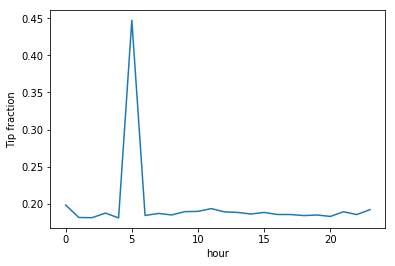

In [10]:


# Perform the computation
tip_frac = result.compute()

# Print the type of tip_frac
print(type(tip_frac))

# Generate a line plot using .plot.line()
tip_frac.plot.line()
plt.ylabel('Tip fraction')
plt.show()

